<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# What is Data Science?
 
_Authors: Alexander Egorenkov (DC), Amy Roberts (NYC)_

## Demo

### Building a Model to Predict Housing Prices

Let's build a model to predict the price that a house will sell for. Such a model might be useful for identifying underpriced houses that you could flip for a profit.

Press `Shift + Return` to run each of the code cells below. You won't understand everything that is happening here; the goal is just to get the big picture.

In [120]:
# Load the "Pandas" library -- think of it as spreadsheets in Python
import pandas as pd

In [121]:
# Use pandas to load in the data
ames_df = pd.read_csv("../assets/data/ames_mod.csv")

In [122]:
# Look at the first five rows
ames_df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2008   
1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   2007   
2         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   2008   
3         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2006   
4         Lvl    AllPub  ...    NaN   NaN         NaN       0     12   2008   

  SaleType  SaleCondition  SalePrice    SF  
0       WD         Normal     208500  1710  
1       WD         Normal     181500  1262  
2       WD         Normal     223500  1786  
3       WD        Abnorml     140000  1717  
4       WD         Normal     250000  2198  

[5 rows x 82 columns]

In [123]:
# To get us started, use just the numeric columns without missing data
ames_df = ames_df.select_dtypes(include="number").dropna(axis="columns")

In [124]:
# Split the data into the column `y` we want to predict and the
# columns `X` we will use to make the predictions
X = ames_df.drop("SalePrice", axis="columns")
y = ames_df.loc[:, "SalePrice"]

In [125]:
# Set aside 25% of the data for testing the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [126]:
# Import a model class
from sklearn.ensemble import RandomForestRegressor

# Create a model from that class
rfr = RandomForestRegressor(n_estimators=200, random_state=2)

# Ask the model to learn a function that predicts `y` from `X`
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

That's it! We just built a machine learning model.

Let's compare a few of the model's predictions to the actual values:

In [127]:
list(zip(rfr.predict(X_test), y_test))[:5]

[(213289.505, 257500),
 (162797.215, 185000),
 (171376.205, 130000),
 (159789.6, 112000),
 (135814.745, 148000)]

We can also measure its predictive performance.

In [128]:
# Score the model on the test data
rfr.score(X_test, y_test)

0.8660363621854466

This score tells us (roughly speaking) the percent reduction in error we get by using this model's predictions rather than simply predicting the average sale price every time. This number is substantially greater than 0, so our model works!

### Summary

Here are the high-level steps we performed:

- Load some data.
- Split the data by columns into the "target variable" we want to predict and the "feature variables" we want to use to predict it.
- Split the data by rows into a "training set" that we will use to teach the model and a "test set" that we will use to evaluate its performance.
- Fit a model on the training set. (This is where the model learns a relationship between the features and the target.)
- Evaluate the model on the test set by measuring the accuracy of its predictions.

These steps are the bare minimum for the kind of data modeling that is the focus of this course.

## Types of Data Work

### Data Disciplines

- **Analytics** makes **no** automated judgments. Instead, it surfaces relevant information to human decision makers, e.g. through reports and dashboards.
- **Statistics** makes **one** automated judgment at a time by testing a hypothesis or estimating a parameter (e.g. does making a button red rather than yellow lead to higher click-through rates?). It was invented to make science more rigorous and objective.
- **Machine learning** produces **indefinitely many** automated judgments by developing models that can be applied again and again (e.g. predicting prices for houses based on size and location). It was invented as an approach to artificial intelligence.

"Data science" encompasses both machine learning and statistics. Data analytics is generally considered "not data science," but it should not be considered "less than" data science!

**Exercise**

*Time*: 1 min\
*Format*: Individual\
*Post answers*: Yes

Identify each of the following tasks as analytics, statistics, or machine learning.

- Producing a model that uses Twitter data to forecast oil production in Saudi Arabia one month into the future.

Machine learning

- Pulling oil production data from a database, aggregating it by state, and putting the results into a PowerPoint deck.

Analytics

- Evaluating whether a change in month-over-month Iranian oil production is meaningful or just a random fluke.

Statistics

### Types of Machine Learning

This course focuses on **supervised learning** with **tabular**, **cross-sectional** data.

#### Supervised Learning (a.k.a. “predictive modeling”):

Given a bunch of examples with input features and an output label, predict the output label for new examples.

**Examples:**

- Given examples of houses with information about features such as average home price in the same neighborhood, number of square feet, and so on, along with selling price, predict the selling prices of other houses based on the same set of features. Predicting an essentially *continuous quantity* such as price is called **regression**.
- Given examples of emails labeled as spam or "ham," predict whether other emails are spam or ham based on their contents. Predicting a *discrete category* such as spam/ham is called **classification**. A classification problem can involve more than two categories ([example](https://github.com/uptake/autofocus)).

A "label" is an example of the output that a model should produce. A "feature" is a variable that a model uses to predict a label.

**Major challenges:**

- Getting good labeled data.
- Keeping focus on business value rather than just building the most accurate model.

**Limitation:**

If we train a model on data that was collected passively (i.e. not from a controlled experiment), then we can't reliably use supervised learning to infer what would happen if we were to interfere in the system. For instance, the fact that houses with great kitchens generally sold for \\$300k+ wouldn't necessarily imply that we could sell a house for \\$300k+ if we gave it a great kitchen -- it may be that the houses with great kitchens also have many other things going for them (high square footage, good neighborhood, etc.) Correlation does not imply causation!

**Note:** Recommendation systems (e.g. "Customers who viewed this item also viewed...") can typically be regarded as using a form of supervised learning, but their inner workings are sufficiently distinctive that we will not cover them in this course.

#### Unsupervised Learning

Given a bunch of examples with features, find some kind of structure.

**Examples:**

- Put coins into groups that are similar to one another in terms of weight, composition, etc. Representing objects as members of *groups* is called **clustering**.
- Identify five traits that capture a large proportion of the personality variation among people. Representing objects in terms of a smaller number of features than you started with is called **dimensionality reduction**.
- Flag unusual-looking credit card transactions. Identifying unusual objects is called **anomaly detection**.

**Major challenges:** 

- Evaluating performance in the absence of labels.
- Deciding what to do with the results. I have often seen people use clustering to put people in groups when what they really want to do is to predict how those people will behave. They got clusters, but it wasn't clear what to do with them. They would have been better off using supervised learning.

**Exercise**

*Time:* 6 mins\
*Format:* Small groups\
*Post answers:* Yes

Apply two of the following labels to each task below. For instance, the following task would get the labels "supervised learning" and "regression:" "Given data on prior home sales that includes home features (e.g. number of bedrooms) and sales price, predict sales prices for a new set of homes described by the same features."

**Labels:**

- Supervised learning
- Unsupervised learning
- Regression
- Classification
- Clustering
- Dimensionality reduction
- Anomaly detection

**Tasks:**

- Given sensor data from a locomotive and times within the data set in which the engine failed, use new sensor data to predict whether or not the engine will fail in the next two weeks.

Supervised learning, classification

- Given sensor data from a locomotive, identify periods of time in which the engine is behaving abnormally.

Unsupervised learning, anomaly detection

- Given a set of chest X-rays with physician's diagnoses of pneumonia and other diseases, identify which patients represented in a new set of chest X-rays have pneumonia.

Supervised learning, classification

- Given sensor data from a locomotive that includes GPS and fuel consumption information, predict how much fuel a locomotive will consume on a trip between two specified points.

Supervised learning, regression

- Given a set of music audio files, group files that seem to have similar musical styles (without labeling them as belonging to particular genres).

Unsupervised learning, clustering

- Derive "musical fingerprints" that allow an algorithm running on a remote server to identify what song a phone user is hearing with as little data transmission as possible. (For this exercise, focus on the process of creating the musical fingerprints -- using those fingerprints to identify songs is a separate step.)

Unsupervised learning, dimensionality reduction

$\blacksquare$

#### Reinforcement Learning

*Reinforcement learning* is learning by trial and error. A reinforcement learning system actively changes the state of a system and receives feedback on the results. For instance, a chess-playing reinforcement learning system makes moves in a chess game and ultimately wins or loses that game.

#### Summary

There are three main branches of machine learning:

1. **Supervised learning**: we have data with labels, and we want a machine to predict the label for new data.
2. **Unsupervised learning**: we have data without labels, and we want a machine to uncover patterns in the data.
3. **Reinforcement learning**: we want a machine to interact with an environment and learn how to achieve a goal through trial and error.

This course focuses on supervised learning, excluding recommendation systems, because it has the most high-impact applications currently.

## Types of Data

### Tabular Data (a.k.a. "Structured Data")

*Tabular data* is data arranged in tables (rows and columns).

### Unstructured Data

We can also do machine learning with "unstructured data" such as images, video, text, and audio. For instance, you could train a model to extract the text from images of street signs.

<img src="../assets/images/street_signs.jpg" width=400>

### Cross-Sectional Data

<img src="../assets/images/cross_sectional_data.png" width=400>

Data collected at a single point in time for each individual is called **cross-sectional data**.

### Time Series/Longitudinal Data

<img src="../assets/images/time_series_data.png" width=400>

Data on the same variables collected at multiple time points from the same individuals is called **longitudinal** for **time-series** data.

## Types of Supervised Learning Models

We call the thing that learns to predict a target variable from a set of input features a *model*. There are a huge variety of model types, but you can handle the vast majority of supervised learning problems very well with just two families of models:

1. Decision tree ensembles
2. Neural networks

### Decision Tree Ensembles

A decision tree for the Ames housing dataset asks a series of yes/no questions about each house, and then predicts that the price will sell for the average price among houses in the training data that answered the questions in the same way. For instance, the decision tree below would predict that a with a three-car garage and 1500 square feet of above-grade living area would sell for \\$254,316.90 because that is the average sale price it saw for similar houses in the training set.

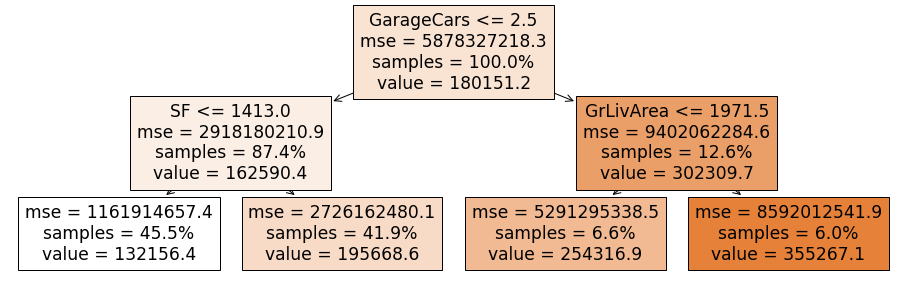

In [129]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(16, 5))
plot_tree(
    DecisionTreeRegressor(max_depth=2).fit(X.drop(columns="OverallQual"), y),
    feature_names=X.columns.drop("OverallQual"),
    filled=True,
    proportion=True,
    rotate=True,
    precision=1,
    ax=ax,
)

The model can learn from the examples in the training set what questions it should ask to get the best results.

Decision trees make minimal assumptions about the relationship between the features and the target variable. This flexibility is a double-edged sword: we can use decision trees off the shelf just about anywhere, but they can have a hard time distinguishing between real patterns and random noise. We address this problem by *averaging over many decision trees* that are all trained somewhat differently, a strategy we call *ensembling*. The random forest that we trained at the top of this notebook is a type of decision tree ensemble.

A deeper problem for decision tree ensembles is that they cannot *extrapolate*. For instance, the tree above would predict the same price for a 10,000 square foot house as it does for a 2,000 square feet house, because all it can do is lump that house in with the most similar houses it has seen, none of which were anywhere close to 10,000 square feet. Extrapolation requires a more opinionated model.

### Neural Networks

Unlike decision trees, neural networks assume that the relationship between the features and the target variable can be modeled using a function of a specific form. The simplest kind of neural network is a *linear regression* model, which assumes that you can model the target variable by starting with a baseline value and adjusting up or down from there by a fixed amount for each unit of each input feature.

For instance, the linear regression model below says that you can model housing price by starting with a baseline value of -\\$16,417 and adding \\$84 for each square foot and \\$39,542 for each car that fits in the garage.

In [131]:
from sklearn.linear_model import LinearRegression

feature_cols = ["SF", "GarageCars"]
lr = LinearRegression().fit(X.loc[:, feature_cols], y)
f"SalePrice = {int(lr.intercept_)} + " + " + ".join(
    (f"{int(coef)}*{feature_name}")
    for feature_name, coef in zip(feature_cols, lr.coef_)
)

'SalePrice = -16417 + 84*SF + 39542*GarageCars'

The model learns from the examples in the training set what numbers to use for the baseline and for the adjustment for each variable.

This approach can solve the extrapolation problem, at least in principle: it would at least predict a bigger price for 10,000 square foot house than for a 2,000 square foot house. Its major weakness is that it will not perform well if its very specific assumptions are not satisfied.

The traditional statistical approach to this problem is to fit simple models and test their assumptions in a very painstaking way.

The modern machine learning approach is to fit extremely complex models in ways that prevent them from overfitting to random noise in the dataset. This approach is called *deep learning*. It is beyond the scope of this course, but you will be in a good position to study it when the course is over. It works extraordinarily well for unstructured data. It can also work well for structured data but tends to require more work than decision tree ensembles to get good results, unless the problem requires extrapolation.

### Summary

This course focuses on getting a computer to learn from examples how to predict a target variable from various feature variables, using data that is organized into rows and columns (one column per variable, one row per individual), where time is not an important factor and we are not interfering in the system.

We focus on two types of models: (1) decision tree ensembles and (2) the simplest kinds of neural networks.

**Exercise**

*Time:* 1 min\
*Format:* Individual\
*Post answers:* Yes

- List five specific product features that you think use data science (e.g. Netflix movie recommendations).

- Making product suggestions on Amazon.
- Offering election and sports coverage on the stats site FiveThirtyEight.
- Calculating daily bet predictions on the fantasy sports site DraftKings.
- Returning auto-translate and search results on Google.

$\blacksquare$

## The Data Science Workflow

![](../assets/images/Data-Framework-White-BG.png)

**Notes**

- The idea of a "hypothesis-driven approach" is more appropriate for statistics than machine learning. For us, the "frame" step has more to do with identifying a practically significant use case for supervised learning.
- For us, the primary output of the "Analyze" phase is a model that can be used to automate decisions. The "Interpret" and "Communicate" phases are primarily about quantifying the value of the model and getting people to use it. However, the process of creating the model can also generate more one-off "insights" that you will want to interpret and communicate like an analyst or statistician.
- This process is typically iterative.
- Talking with subject-matter experts early and often greatly increases your chances of producing a useful result.

### Application: Data Science Workflow Through Ames Data

#### 1. Frame

Identify:

- High-level business objectives
- Deliverables
- Success criteria
- Relevant data sets

##### High-Level Business Objectives

Suppose a real estate company wants to predict prices for houses so that they can more reliably buy them at a discount, make cost-effective improvements, and sell them for a large profit.

##### Deliverables

E.g.

* Presentation to the real estate team
* Business report discussing results, procedures used, and rationales
* API that provides estimated returns

##### Success Criteria

This project will be considered a success if the estimated returns provided by the API are at least as accurate as the estimates that the company currently produces manually (while saving time).

**Note:** It can be difficult to predict what level of performance a data science model will be able to achieve before you dig into the data and start building models. **Keep your criteria for success minimal** and **figure out as quickly as possible whether you are going to fail**.

##### Relevant Data Sets

**Key questions:**

- What data would be ideal?
- What data is available?
- What can we do to close that gap?
- Is it plausible that we can succeed with the data we can get?

**Subsidiary questions:**

- Where is the data set coming from? How was it collected? Can it be trusted?
- What variables does it contain?
- If the data is spread across multiple pieces, how do those pieces fit together?
- Do our data appropriately align with the question/problem statement?
- Is this data set aggregated? Can we use the aggregation, or do we need to obtain it pre-aggregation?
- Is there enough data?
- Does the data cover all of the types of situations (times, places, etc.) to which we want to apply our model?
- Is the data representative
- How can we access it (e.g. file, database, web API, web scraping)?
- What are the most appropriate tools for working with the data, given its size and format?

**Exercise**

*Time:* 8 mins\
*Format:* Small groups\
*Post answers:* Yes

Answer the following questions about the Ames housing data set based on [this documentation](../assets/data/ames_data_documentation.txt).

- What would an ideal data set look like for the project of predicting housing prices?

- It would include detailed information about houses, their locations, and their sales prices.
- It would cover many different markets and long periods of time, including very recent data.

- How closely does the Ames housing data set match the ideal data that you envisioned?

It does provide extensive data about house characteristics. However, it is exclusive to one city and a small number of years (during which there was a housing market crash).

- Would it be sufficient for our purposes?

It seems plausible that we could at least build a decent prototype model using this data. I would certainly expect to need additional data for the model to perform well in very different markets, such as coastal cities.

- What limitations does it have?

It only covers Ames from 2006 to 2010. A model built on this data might not work at all for very different markets (e.g. San Francisco today). 

$\blacksquare$

#### 2. Prepare

Data scientists often work with data that they did not collect ("secondary data"), so they have to use *data dictionaries* and other documentation to learn how the set was gathered.

Here's an example of a data dictionary:

Variable | Description | Type of Variable
---| ---| ---
Square Footage | Floating Point | Continuous
Street Type | 1 - Gravel, 2 - Paved | Categorical
Neighborhood | String, e.g., 'Lake View' | Categorical
Number of Bedrooms | Integer | Discrete

**Common data preparation steps**:

- Addressing missing values
- Addressing outliers
- Restructuring
- Reformatting
- Aggregating
- Transforming

![](../assets/images/clean_data_borat.png)

#### 3. Analyze

##### Descriptive Modeling

Data scientists use statistics such as frequencies, means, and standard deviations to give compact descriptions of their data sets.

Variable | Mean or Frequency (%)
---| ---
Square Footage | 2201.3
Street Type - Gravel | 8%
Street Type - Paved | 92%
Number of Bedrooms | 1.8

##### Supervised Learning

Data scientists build models to predict either discrete outcomes (e.g. this house will / will not sell in the next month) or continuous values (e.g. this house will sell for $358,000).

#### 4. Interpret

- Check your model for correctness.
- Determine what your model is really telling you, keeping in mind the limitations of your data and modeling techniques.
- Determine what one-off recommendations your model supports and/or what kinds of ongoing decisions it can support.
- Get input from subject-matter experts!

#### 5. Communicate

Without effective communication, your work will not be used.

- Identify your goals.
- Put the bottom line front and center: _"Kitchen renovations have a positive return on investment, while other renovations do not."_
- Speak the language of your audience (often $$$).
- Practice, ideally with a real audience that can give useful feedback.

**Iterate, iterate, iterate.**

### Summary

Use the data science workflow to develop solutions.
  - **Frame** a problem by identifying an opportunity to save money and/or generate new revenue through supervised learning.
  - **Prepare** your data.
  - **Analyze** your data.
  - **Interpret** the results of your analysis in terms of your business.
  - **Communicate** your results to different audiences.

## Why Not Use GUI Tools (Excel, Power BI, Tableau, etc.)?

Excel tends to show the data and hides the code, while programming languages tend to show the code and hide the data. Excel is fantastic for non-mission-critical work with data with fairly simple logic.

Tableau and similar tools are fantastic for analytics work.

Programming languages such as Python have a number of advantages over GUI tools for machine learning and other data work:

- **Flexibility:** Standard programming languages are [Turing Complete](https://en.wikipedia.org/wiki/Turing_completeness), so they can (in principle) solve any problem that can be solved with a computer.
- **Performance:** Numerical computing libraries such as NumPy for Python are highly optimized for speed and memory efficiency. If that's not enough, you can drop down to a lower-level language for further optimizations and/or run many jobs in parallel across multiple computers. By contrast, Excel doesn't even let you look at more than medium-sized data.
- **Extensibility:** Anyone in the world can create and publish a package that extends the language. As a result, the package ecosystem for doing data science in Python is incredible, and it is constantly improving.
- **Transparency and Reproducibility:** When you use code to analyze data, that code serves as a record of exactly what you did. Having such a record makes it easier to catch errors and to apply the same steps to new data. By contrast, [Excel is notoriously good at hiding errors](https://www.theverge.com/2013/4/17/4234136/excel-calculation-error-infamous-economic-study).
- **Deployability:** Code can be set up to run automatically, e.g. to create scheduled reports or to recommend products on a website in real time.
- **Version Control:** Code can be put into a version control system so that you can inspect how it has changed over time and roll it back when something goes wrong.
- **Cost:** Python is free.

## Summary

- Analytics produces artifacts that make no judgments (on their own), statistics produces artifacts that each make one judgment, machine learning produces artifacts that make indefinitely many judgments.
- We focus on supervised learning (learning from examples to predict the value of a target variable from the values of feature variables in the absence of intervention) with data that is tabular (arranged in rows and columns) and cross-sectional (containing one time slice per individual) using decision tree ensembles and simple neural networks.